Kmeans on SOM output 

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from minisom import MiniSom
from pre_processing_functions import *

def train_som_cluster_with_kmeans(df, features, som_size=3, iterations=5000, sigma=1.0, learning_rate=0.5, n_clusters=9):
    df = df.copy()
    X = df[features].values

    # Train SOM
    som = MiniSom(x=som_size, y=som_size, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(X)
    som.train(X, num_iteration=iterations, verbose=True)

    # Get BMU coordinates
    bmu_coords = np.array([som.winner(x) for x in X])  # Each BMU is a (x,y) coordinate

    # Apply KMeans to BMU coordinates
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['kmeans_from_bmu'] = kmeans.fit_predict(bmu_coords)

    # Plot SOM distance map
    #plt.figure(figsize=(6, 6))
    #plt.pcolor(som.distance_map().T, cmap='bone_r')
    #plt.colorbar()
    #plt.title('SOM U-Matrix')
    #plt.show()

    return df


In [6]:
df = preprocess('customer_info.csv')

In [9]:
features = ['lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products']

In [12]:
data = train_som_cluster_with_kmeans(df, features, som_size=3, iterations=5000, sigma=1.0, learning_rate=0.5, n_clusters=9)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1962801913295817


In [13]:
data

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,kmeans_from_bmu
0,0.857433,April Clark,1.005802,0.630498,1.397496,0.222470,0.696974,-0.746485,0.522647,-0.041676,...,2.001266,-0.592996,0.723919,-1.473453,-1.210310,1.280858,-0.070294,-0.723919,None,3
1,-1.143473,Paul Ketchum,-0.994231,-0.905273,0.068770,-1.091753,0.696974,-0.702608,-1.013591,0.175439,...,-0.703009,2.884929,-0.331683,0.678678,-0.613011,-0.272739,1.494428,0.331683,Bsc.,1
2,1.681529,Mary Downing,1.005802,0.630498,2.726221,-1.091753,2.650070,-0.349564,0.156665,0.175439,...,1.422396,-0.778881,-0.753924,-1.473453,1.823423,0.400078,-1.020305,0.753924,None,3
3,0.132703,Manuel Kueny,-0.994231,-0.905273,-1.259955,0.222470,-1.256123,-0.459509,3.493829,0.175439,...,0.575690,-0.263788,-1.176165,-1.473453,-0.281021,-0.116035,-0.293826,1.176165,None,5
4,-0.312366,Curtis Tharp,-0.994231,-0.137388,0.068770,0.222470,1.348006,1.359034,-0.140867,0.175439,...,0.774406,-0.075508,-0.542804,0.678678,1.767444,0.312405,0.265003,0.542804,Phd.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475526,Mary Diaz,1.005802,-0.137388,0.068770,-1.091753,-0.605091,2.022820,0.425769,0.609668,...,0.074578,-0.581315,0.723919,-1.473453,0.136872,2.169138,-1.579134,-0.723919,None,7
34056,0.640352,John Gross,-0.994231,-0.137388,0.068770,-1.091753,0.045942,-0.325239,0.024460,-0.041676,...,1.940787,0.888538,0.935039,0.678678,-0.132179,-0.503135,-0.740890,-0.935039,None,0
34057,1.689232,Kathleen Harper,1.005802,-0.137388,-1.259955,0.222470,-0.605091,-0.399027,1.401167,0.826783,...,0.636169,0.632977,0.723919,-1.473453,0.927389,-0.633962,-1.635017,-0.723919,None,5
34058,-0.143409,Jenny Landry,1.005802,-0.137388,0.068770,0.222470,0.696974,0.758270,0.274519,-0.910135,...,-0.029100,0.305715,0.090558,0.678678,-0.715458,0.028906,0.544418,-0.090558,Msc.,0


In [17]:
import umap
import seaborn as sns

In [19]:
def umap_kmeans(df, n_neighbors=5, min_dist=0.01):

    # Select only numeric columns (exclude 'cluster' since it is our 'target')
    features = df.select_dtypes(include='number').drop(columns=['kmeans_from_bmu'], errors='ignore')
    features_scaled = features.values

    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['kmeans_from_bmu'], palette='tab10', s=70)
    plt.title("UMAP clusters - Kmeans")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


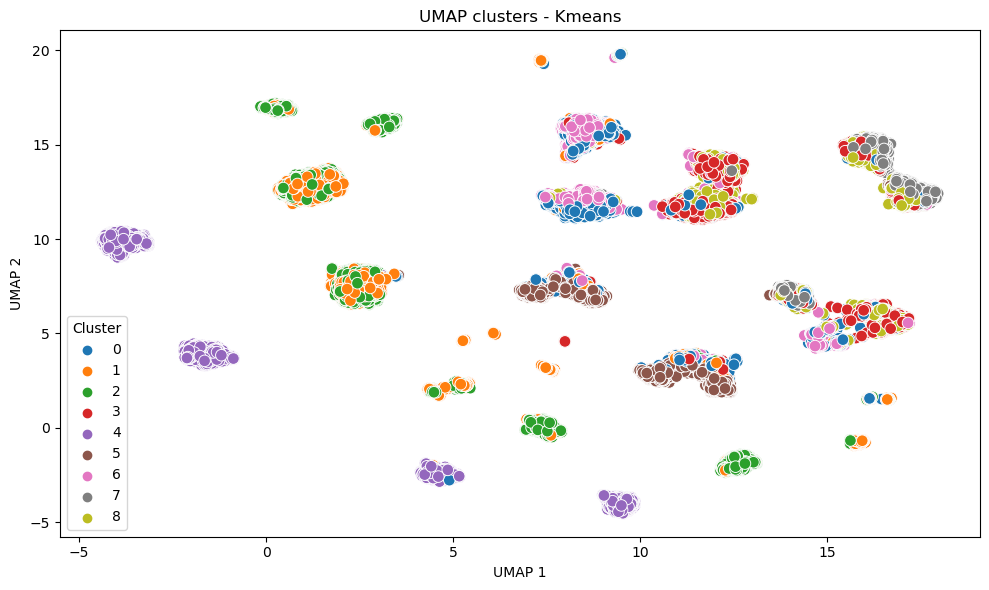

In [21]:
umap_kmeans(data, n_neighbors=5, min_dist=0.01)